In [15]:
import random
import networkx as nx
import matplotlib.pyplot as plt

In [58]:
gn = 6
k = 5
ns = 50
p = 0.9

graph = nx.grid_graph([k * gn, k * gn])
        
# this part adds queen adjacency
for i in range(k*gn-1):
   for j in range(k*gn):
       if j<(k*gn-1):
           graph.add_edge((i,j),(i+1,j+1))
           graph[(i,j)][(i+1,j+1)]["shared_perim"]=0
       if j >0:
           graph.add_edge((i,j),(i+1,j-1))
           graph[(i,j)][(i+1,j-1)]["shared_perim"]=0

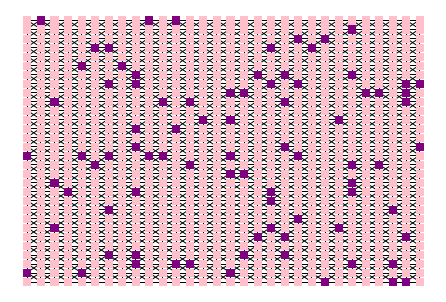

In [33]:
#random method
for n in graph.nodes():
    graph.node[n]["population"] = 1

    if random.random() < p:
        graph.node[n]["pink"] = 1
        graph.node[n]["purple"] = 0
    else:
        graph.node[n]["pink"] = 0
        graph.node[n]["purple"] = 1
#     if 0 in n or k * gn - 1 in n:
#         graph.node[n]["boundary_node"] = True
#         graph.node[n]["boundary_perim"] = 1

#     else:
#         graph.node[n]["boundary_node"] = False

cdict = {1: "pink", 0: "purple"}

plt.figure()
nx.draw(
    graph,
    pos={x: x for x in graph.nodes()},
    node_color=[cdict[graph.node[x]["pink"]] for x in graph.nodes()],
    node_size=ns,
    node_shape="s",
)
plt.show()

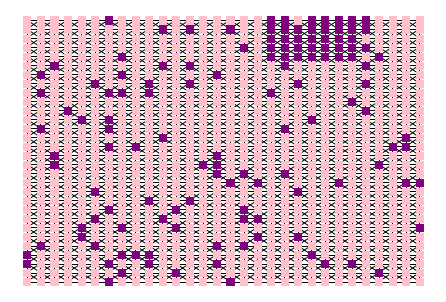

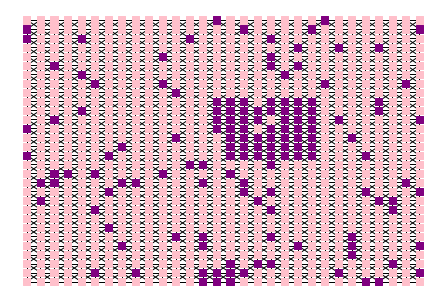

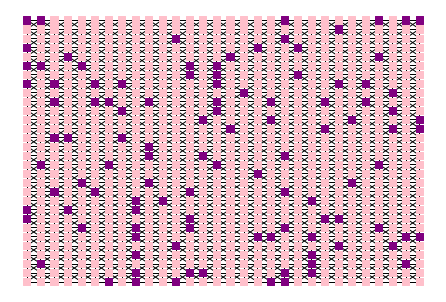

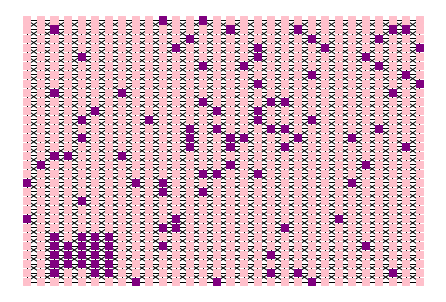

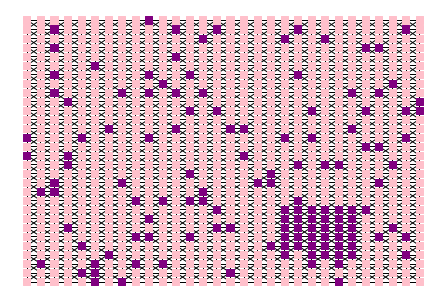

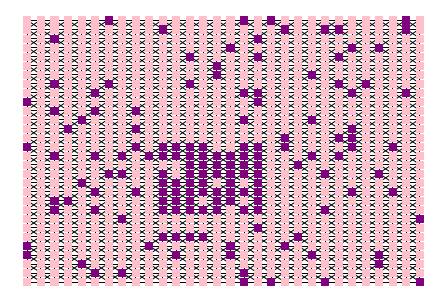

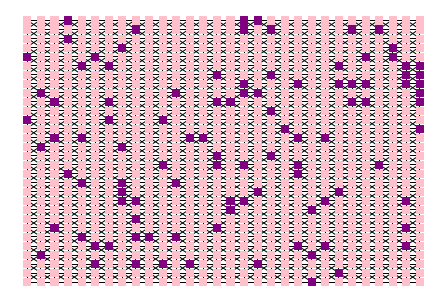

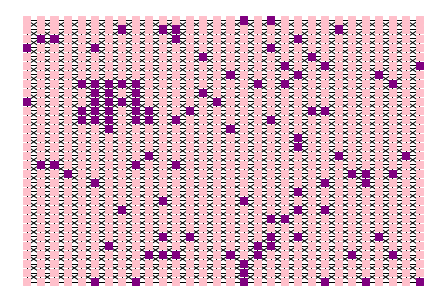

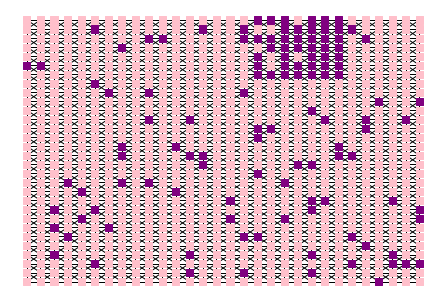

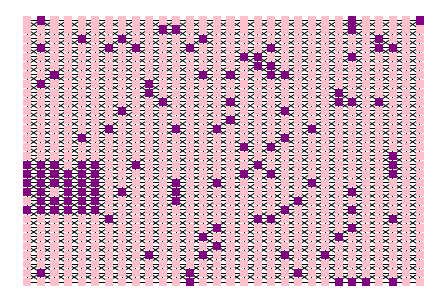

In [90]:
#square method
#To be updated! Will adjust square so that it does not run off of grid.

from random import choice
for k in range(10):
    random_node = choice(list(graph.nodes()))

    w = choice(range(5,10))

    square_nodes = []
    for i in range(random_node[0],random_node[0]+w):
        for j in range(random_node[1],random_node[1]+w):
            square_nodes.append((i,j))

    for n in graph.nodes():
        if n in square_nodes:
            #print(n)
            #graph.node[n]["square"]
            if random.random() < .9:
                graph.node[n]["purple"] = 1
                graph.node[n]["pink"] = 0
            else:
                graph.node[n]["purple"] = 0
                graph.node[n]["pink"] = 1
        else:
            if random.random() < .1:
                graph.node[n]["purple"] = 1
                graph.node[n]["pink"] = 0
            else:
                graph.node[n]["purple"] = 0
                graph.node[n]["pink"] = 1

    cdict = {1: "pink", 0: "purple"}
    
    plt.figure()
    nx.draw(
        graph,
        pos={x: x for x in graph.nodes()},
        node_color=[cdict[graph.node[x]["pink"]] for x in graph.nodes()],
        node_size=ns,
        node_shape="s",
    )
    plt.show()

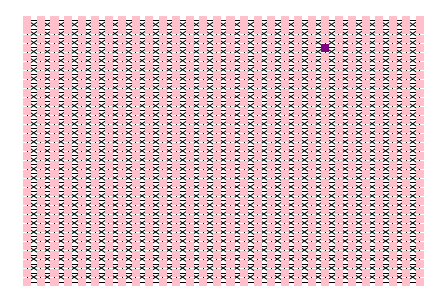

In [95]:
#rich get richer model
#color all nodes pink
for n in graph.nodes():
    graph.node[n]["population"] = 1
    graph.node[n]["pink"] = 1
    graph.node[n]["purple"] = 0
#pick a random node to be purple
random_node = choice(list(graph.nodes()))
graph.node[random_node]["pink"]=0
graph.node[random_node]["purple"]=1

#Add a purple node
#work in progress

cdict = {1: "pink", 0: "purple"}

plt.figure()
nx.draw(
    graph,
    pos={x: x for x in graph.nodes()},
    node_color=[cdict[graph.node[x]["pink"]] for x in graph.nodes()],
    node_size=ns,
    node_shape="s",
)
plt.show()

In [96]:

#Add a purple node
graph.neighbors(random_node)
